In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# CARGA DE DATOS: Ajustado al nombre físico real
path = '../data/processed/df_maestro_unificado.csv'

try:
    df_maestro = pd.read_csv(path)
    # Aseguramos el tipo de dato temporal
    df_maestro['Fecha_Actividad'] = pd.to_datetime(df_maestro['Fecha_Actividad'])
    print(f" Dataset cargado. Registros: {len(df_maestro)}")
except FileNotFoundError:
    print(f" Error: No se encontró el archivo en {path}")

 Dataset cargado. Registros: 2324


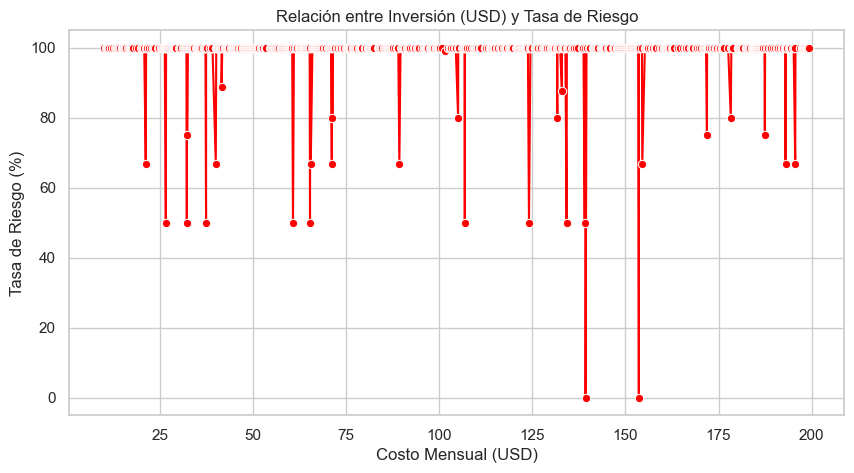

Tasa de Riesgo por Costo:
Costo_Suscripcion_USD
139.31      0.0
153.61      0.0
139.07     50.0
134.22     50.0
124.12     50.0
          ...  
198.79    100.0
198.97    100.0
198.99    100.0
199.29    100.0
10.18     100.0
Name: En_Riesgo, Length: 924, dtype: float64


In [2]:
# 1. Análisis de Riesgo por Costo de Suscripción (Segmentación por Valor)
costo_riesgo = df_maestro.groupby('Costo_Suscripcion_USD')['En_Riesgo'].mean().sort_values() * 100

plt.figure(figsize=(10, 5))
sns.lineplot(x=costo_riesgo.index, y=costo_riesgo.values, marker='o', color='red')
plt.title('Relación entre Inversión (USD) y Tasa de Riesgo')
plt.ylabel('Tasa de Riesgo (%)')
plt.xlabel('Costo Mensual (USD)')
plt.show()

print("Tasa de Riesgo por Costo:")
print(costo_riesgo)

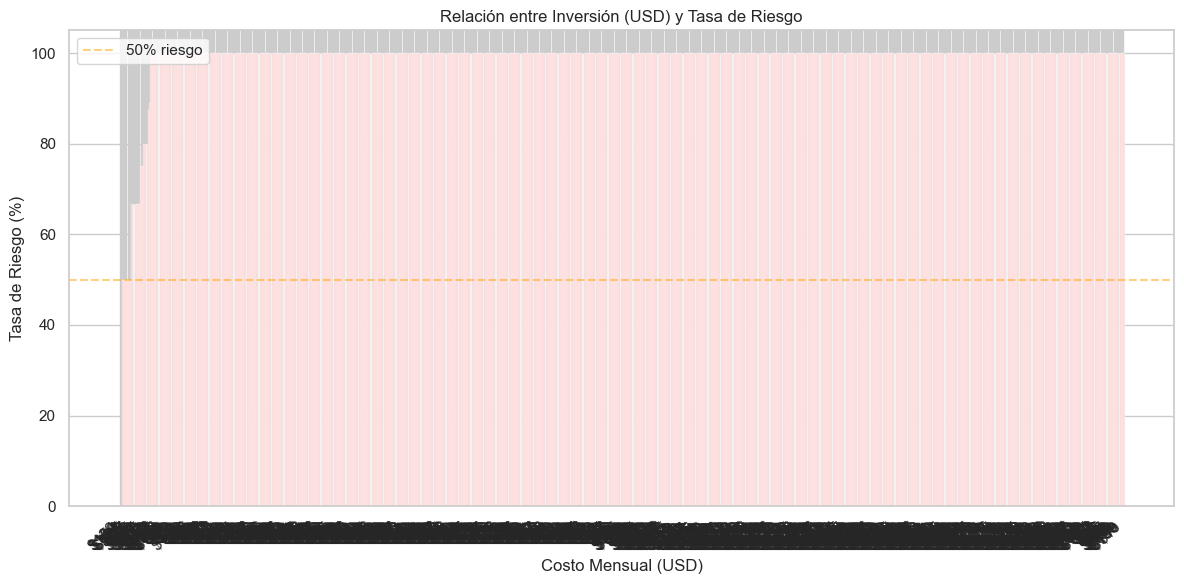

Tasa de Riesgo por Costo:
Costo_Suscripcion_USD
139.31      0.0
153.61      0.0
139.07     50.0
134.22     50.0
124.12     50.0
          ...  
198.79    100.0
198.97    100.0
198.99    100.0
199.29    100.0
10.18     100.0
Name: En_Riesgo, Length: 924, dtype: float64


In [3]:
# 1. Análisis de Riesgo por Costo de Suscripción (Segmentación por Valor)
costo_riesgo = df_maestro.groupby('Costo_Suscripcion_USD')['En_Riesgo'].mean().sort_values() * 100

plt.figure(figsize=(12, 6))
plt.bar(range(len(costo_riesgo)), costo_riesgo.values, color='red', alpha=0.7)
plt.xticks(range(len(costo_riesgo)), [f'${x:.0f}' for x in costo_riesgo.index], rotation=45, ha='right')
plt.title('Relación entre Inversión (USD) y Tasa de Riesgo')
plt.ylabel('Tasa de Riesgo (%)')
plt.xlabel('Costo Mensual (USD)')
plt.axhline(y=50, color='orange', linestyle='--', alpha=0.5, label='50% riesgo')
plt.legend()
plt.tight_layout()
plt.show()

print("Tasa de Riesgo por Costo:")
print(costo_riesgo)

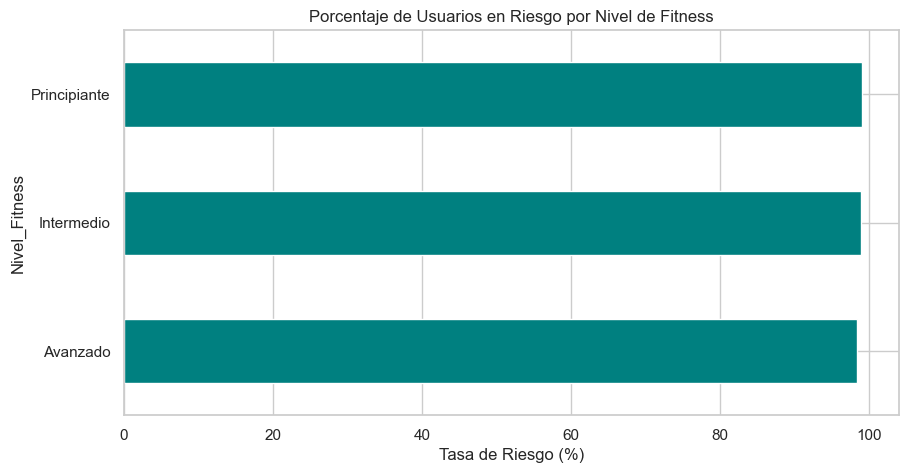

Tasa de Riesgo detallada:
Nivel_Fitness
Avanzado        98.404255
Intermedio      98.841699
Principiante    98.993711
Name: En_Riesgo, dtype: float64


In [4]:
# Análisis de Riesgo por Nivel de Fitness
fitness_risk = df_maestro.groupby('Nivel_Fitness')['En_Riesgo'].mean().sort_values() * 100

plt.figure(figsize=(10, 5))
fitness_risk.plot(kind='barh', color='teal')
plt.title('Porcentaje de Usuarios en Riesgo por Nivel de Fitness')
plt.xlabel('Tasa de Riesgo (%)')
plt.show()

print("Tasa de Riesgo detallada:")
print(fitness_risk)

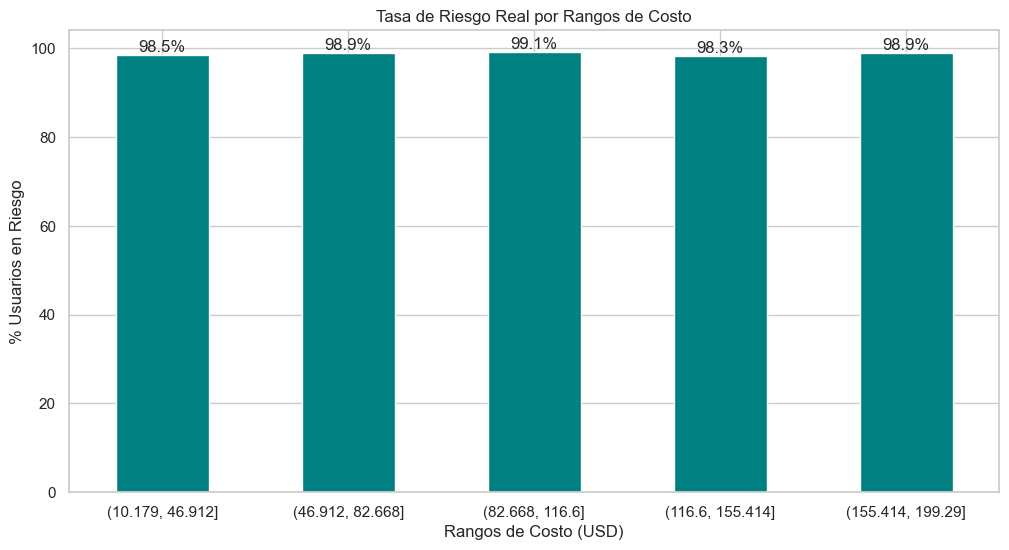

Tasa de Riesgo por Segmento de Precio:
Segmento_Precio
(10.179, 46.912]     98.494624
(46.912, 82.668]     98.924731
(82.668, 116.6]      99.139785
(116.6, 155.414]     98.275862
(155.414, 199.29]    98.924731
Name: En_Riesgo, dtype: float64


In [5]:
# 1. Creamos los grupos de costo manejando los valores duplicados
df_maestro['Segmento_Precio'] = pd.qcut(
    df_maestro['Costo_Suscripcion_USD'], 
    q=5, 
    duplicates='drop'
)

# 2. Calculamos el riesgo por segmento
analisis_precio = df_maestro.groupby('Segmento_Precio', observed=True)['En_Riesgo'].mean() * 100

# 3. Gráfico de barras
plt.figure(figsize=(12, 6))
ax = analisis_precio.plot(kind='bar', color='teal')
plt.title('Tasa de Riesgo Real por Rangos de Costo')
plt.ylabel('% Usuarios en Riesgo')
plt.xlabel('Rangos de Costo (USD)')
plt.xticks(rotation=0)

# Añadimos etiquetas de valor sobre las barras para mayor claridad
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

print("Tasa de Riesgo por Segmento de Precio:")
print(analisis_precio)


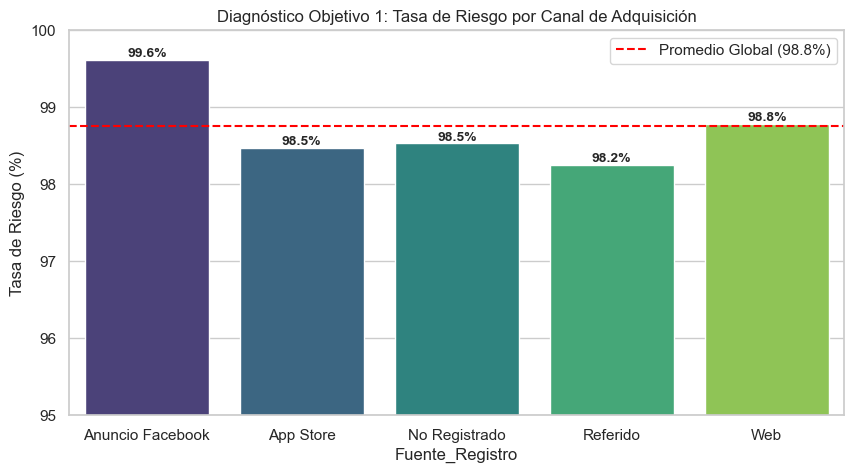

Estadísticas por Fuente:
    Fuente_Registro  Total_Usuarios  Tasa_Riesgo_%
0  Anuncio Facebook             516      99.612403
1         App Store             653      98.468606
2     No Registrado              68      98.529412
3          Referido             513      98.245614
4               Web             574      98.780488


In [6]:
# 1. Agregación estadística por fuente de registro
fuente_stats = df_maestro.groupby('Fuente_Registro')['En_Riesgo'].agg(['mean', 'count']).reset_index()
fuente_stats.columns = ['Fuente_Registro', 'Tasa_Riesgo_Decimal', 'Total_Usuarios']
fuente_stats['Tasa_Riesgo_%'] = fuente_stats['Tasa_Riesgo_Decimal'] * 100

# 2. Visualización optimizada
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=fuente_stats, 
    x='Fuente_Registro', 
    y='Tasa_Riesgo_%', 
    hue='Fuente_Registro', 
    palette='viridis', 
    legend=False
)

# Línea de referencia del promedio global
promedio_global = df_maestro['En_Riesgo'].mean() * 100
plt.axhline(y=promedio_global, color='red', linestyle='--', label=f'Promedio Global ({promedio_global:.1f}%)')

plt.title('Diagnóstico Objetivo 1: Tasa de Riesgo por Canal de Adquisición')
plt.ylabel('Tasa de Riesgo (%)')
plt.ylim(95, 100) # Zoom en la zona crítica
plt.legend()

# Anotaciones de valor sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

print("Estadísticas por Fuente:")
print(fuente_stats[['Fuente_Registro', 'Total_Usuarios', 'Tasa_Riesgo_%']])

In [7]:
import os

# 1. Definimos la ruta de salida
output_dir = os.path.join('..', 'data', 'processed')
output_file = 'metrics_diagnostico_churn.csv'
full_path = os.path.join(output_dir, output_file)

# 2. Creamos el directorio si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"📁 Directorio creado: {output_dir}")

# 3. Guardamos las estadísticas
try:
    fuente_stats.to_csv(full_path, index=False)
    print(f"💾 Métricas exportadas exitosamente a: {full_path}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")

💾 Métricas exportadas exitosamente a: ..\data\processed\metrics_diagnostico_churn.csv
